In [43]:
with open('../py/log.txt','r') as f:
    data=f.read()

In [44]:
import json
data1=[json.loads(a) for a in data.split('\n')[:-1] ]

In [50]:
data1=data1[-300:]

In [51]:
for i,a in enumerate(data1):
    prev_x, prev_y, end_path_s, end_path_d, car_speed, ref_yaw, other_cars=get_variables(a)
    l= (get_best_line(other_cars, line, end_path_s, car_speed))
    print (a['d'])
    if l!=1:
        print (i)
        break

possible:  [True, True, True]
3.418579
possible:  [True, True, True]
3.382217
possible:  [True, True, True]
3.346023
possible:  [True, True, True]
3.275464
possible:  [True, True, True]
3.240124
possible:  [True, True, True]
3.205881
possible:  [True, True, True]
3.172492
possible:  [True, True, True]
3.139276
possible:  [True, True, True]
3.107029
possible:  [True, True, True]
3.044611
possible:  [True, True, True]
3.014322
possible:  [True, True, True]
2.984026
possible:  [True, True, True]
2.924534
possible:  [True, True, True]
2.896317
possible:  [True, True, True]
2.868141
possible:  [True, True, True]
2.840895
possible:  [True, True, True]
2.814675
possible:  [True, True, True]
2.765279
possible:  [True, True, True]
2.742102
possible:  [True, True, True]
2.718931
possible:  [True, True, True]
2.695632
possible:  [True, True, True]
2.649285
possible:  [True, True, True]
2.626108
possible:  [True, True, True]
2.602815
possible:  [True, True, True]
2.581589
possible:  [True, True, T

In [39]:
def get_max_speed(other_cars, line, my_s, my_v):
	"""
	Просто получает максимальную скорость в данном ряду
	"""
	
	nearst=max_s
	nearst_speed=0
	
	for s,d, v in other_cars:
		#если тачка в нашем ряду
		if d>line*4 and d<line*4+4:
			print (s,d,v)
			distance=(s-my_s)%max_s
			if distance<nearst:
				nearst=distance
				nearst_speed=v
	
	#если тачка далеко то пофигу
	if nearst>100:
		return 100
	
	#если слишком близко
	if nearst<5:
		return 1
	
	return nearst_speed+sqrt(2*max_acc*(nearst-5))

In [42]:
other_cars[0][0]

56355.390521970163

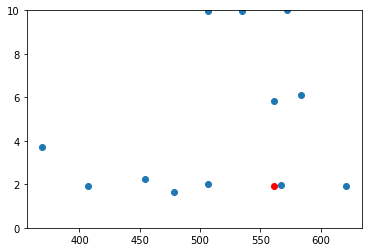

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

tmp=data1[-1]

axes = plt.gca()
axes.set_ylim([0,10])

tmp2=[[a[-2],a[-1]] for a in tmp['sensor_fusion'] if a[-1]>=0]
plt.scatter([a[-2] % max_s for a in tmp2], [a[-1] for a in tmp2])
plt.scatter([tmp['s']],[tmp['d']],color='red')
plt.show()

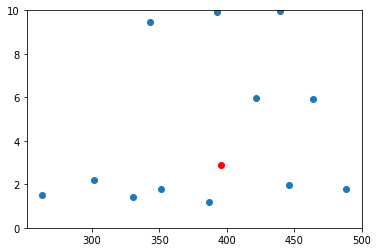

In [56]:
tmp=data1[14]
prev_x, prev_y, end_path_s, end_path_d, car_speed, ref_yaw, other_cars=get_variables(tmp)
axes = plt.gca()
axes.set_ylim([0,10])


tmp2=[[a[-2],a[-1]] for a in tmp['sensor_fusion'] if a[-1]>=0]
plt.scatter([a[-2] % max_s for a in tmp2], [a[-1] for a in tmp2])
plt.scatter([tmp['s']],[tmp['d']],color='red')
plt.show()

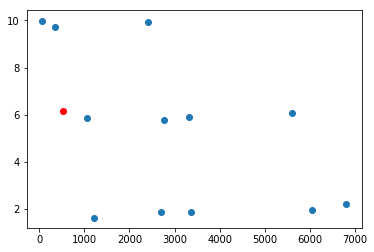

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

tmp=data1[-1]

tmp2=[[a[0],a[1]] for a in other_cars if a[1]>=0]
plt.scatter([a[0] % max_s for a in tmp2], [a[1] for a in tmp2])
plt.scatter([end_path_s], [end_path_d],color='red')
plt.show()

In [9]:
line_ok(other_cars,1,end_path_s)

True

In [50]:
import numpy as np
ar=np.array([[float(a[-2]),float(a[-1])] for a in tmp['sensor_fusion']])
s=tmp['s']
d=tmp['d']
x=(s,d)

In [51]:
def dist(x,y):
    return ((x[0]-y[0])**2+(x[1]-y[1])**2)**(0.5)

In [52]:
d=[dist(a,x) for a in ar]

In [53]:
np.argmin(d)

6

In [54]:
ar[7], x

(array([ 513.2354  ,    2.065666]), (663.8386, 5.826378))

In [57]:
print ('{')
for a in tmp['sensor_fusion']:
    print ('{', ','.join([str(b) for b in a]), '},')
print ('}')

{
{ 0,1313.218,1189.599,18.8987,-1.458298,537.9053,1.741095 },
{ 1,1507.962,1167.047,17.38324,-1.779696,733.9502,2.142513 },
{ 2,1340.359,1182.39,20.77376,-2.663067,565.5621,5.902644 },
{ 3,1422.491,1177.768,14.66686,-2.047278,647.8659,1.880554 },
{ 4,1347.012,1177.614,19.93764,-2.125543,572.6232,10.05186 },
{ 5,1488.332,1165.284,17.28355,-2.167764,714.7482,5.981956 },
{ 6,1441.997,1171.338,21.76113,-2.748472,668.0113,5.786294 },
{ 7,1288.707,1190.805,17.50879,-0.822025,513.2354,2.065666 },
{ 8,1481.736,1162.082,17.80452,-2.259625,708.609,9.990233 },
{ 9,1286.259,1182.983,18.8864,-0.8778437,511.1425,9.989671 },
{ 10,1402.042,1180.428,15.71919,-1.820126,627.2449,1.905435 },
{ 11,1242.449,1192.848,18.53493,-0.105787,466.9076,1.726149 },
}


In [59]:
tmp['s'], tmp['d']

(663.8386, 5.826378)

In [45]:
tmp

{'d': 6.023216,
 'end_path_d': 6.010732,
 'end_path_s': 5582.075,
 'previous_path_x': [159.7076,
  159.6891,
  159.6706,
  159.6521,
  159.6336,
  159.6151,
  159.5966,
  159.578,
  159.5593,
  159.5406,
  159.5218,
  159.503,
  159.4841],
 'previous_path_y': [2259.126,
  2258.686,
  2258.246,
  2257.806,
  2257.366,
  2256.926,
  2256.486,
  2256.047,
  2255.607,
  2255.168,
  2254.728,
  2254.288,
  2253.849],
 's': 5576.354,
 'sensor_fusion': [[0,
   179.8204,
   2416.613,
   -4.834095,
   -20.09481,
   5418.833,
   6.135165],
  [1, 159.698, 2137.648, 0.1768622, -16.12407, 5698.043, 2.117703],
  [2, 161.1684, 2084.8, 0.9614065, -16.28148, 5750.658, 1.988172],
  [3, 162.095, 2223.569, -0.9347798, -17.63589, 5612.225, 1.903185],
  [4, 166.7954, 2311.137, -1.380448, -15.83895, 5524.602, 2.192861],
  [5, 156.2329, 2185.881, -0.4008369, -15.59695, 5649.955, 6.107178],
  [6, 151.7873, 2155.222, -0.191997, -14.85494, 5680.684, 10.04574],
  [7, 159.195, 2255.121, -0.8747857, -21.95857, 5580

In [78]:
import pandas as pd

highway=pd.read_csv('../data/highway_map.csv',delimiter=' ', names=['x','y','s','dx','dy'])

In [118]:
def ClosestWaypoint(x,y, highway):
    """
    Define closest point number
    """
    d=[dist((x,y),(x1,y1)) for x1,y1 in highway[['x','y']].values]
    return int(np.argmin(d))

In [200]:
from math import atan2, pi, fabs, sin, cos

def  NextWaypoint( x,  y,  theta, highway ):
    n = ClosestWaypoint(x, y, highway)
    closestWaypoint = highway[['x','y']].values[n]
    heading = atan2( (closestWaypoint[1] - y), (closestWaypoint[0] - x) )
    angle = fabs(theta - heading)
    if angle > pi / 4:   n+=1
    return n

In [201]:
def distance(x,y,x1,y1): return dist((x,y),(x1,y1))

def get_frenet(x,y, theta, highway):
    next_wp = NextWaypoint(x, y, theta, highway)
    
    prev_wp =  next_wp - 1 if next_wp>0 else len(highway)-1
    
    maps_x=highway['x'].values
    maps_y=highway['y'].values
    
    
    n_x = maps_x[next_wp] - maps_x[prev_wp]
    n_y = maps_y[next_wp] - maps_y[prev_wp]
    x_x = x - maps_x[prev_wp]
    x_y = y - maps_y[prev_wp]
    
    #find the projection of x onto n
    proj_norm = (x_x * n_x + x_y * n_y) / (n_x * n_x + n_y * n_y)
    proj_x = proj_norm * n_x
    proj_y = proj_norm * n_y
    
    frenet_d = distance(x_x, x_y, proj_x, proj_y)
    
    #see if d value is positive or negative by comparing it to a center point
    
    center_x = 1000 - maps_x[prev_wp]
    center_y = 2000 - maps_y[prev_wp]
    centerToPos = distance(center_x, center_y, x_x, x_y)
    centerToRef = distance(center_x, center_y, proj_x, proj_y)
    
    if centerToPos <= centerToRef:
        frenet_d *= -1
    
    #calculate s value
    frenet_s = 0
    for i in range(prev_wp):
        frenet_s += distance(maps_x[i], maps_y[i], maps_x[i + 1], maps_y[i + 1])
    
    frenet_s += distance(0, 0, proj_x, proj_y)
    
    return (frenet_s, frenet_d)

In [202]:
def deg2rad( x): return x * pi / 180 
def rad2deg( x):  return x * 180 / pi


In [203]:
tmp=data1[867]
x,y,car_yaw,s,d=tmp['x'],tmp['y'],tmp['yaw'],tmp['s'],tmp['d']
angle=deg2rad(car_yaw)

In [204]:
print (get_frenet(x,y,angle, highway))
print (s,d)

(710.81247121487991, 10.052965766821014)
674.1476 10.02558


In [205]:
from tqdm import tqdm_notebook, tqdm

In [179]:
gopa=[]

for tmp in tqdm(data1):
    x,y,car_yaw,s,d=tmp['x'],tmp['y'],tmp['yaw'],tmp['s'],tmp['d']
    angle=deg2rad(car_yaw)
    prediction=get_frenet(x,y,angle, highway)
    d=dist((s,d),prediction)
    gopa.append(d)

100%|██████████| 3890/3890 [00:06<00:00, 590.58it/s]


In [192]:
len(np.where(np.array(gopa)>0.1)[0]), len(gopa)

(831, 3890)

In [196]:
def   getXY( s,  d, highway):
    prev_wp = -1
    
    maps_s,maps_x,maps_y=highway['s'].values, highway['x'].values,highway['y'].values
    
    while (s > maps_s[prev_wp + 1] and (prev_wp < len(maps_s)-1 )):
        prev_wp+=1
    
    wp2 = (prev_wp + 1) % len(highway)
    
    heading = atan2((maps_y[wp2] - maps_y[prev_wp]), (maps_x[wp2] - maps_x[prev_wp]))
    # the x,y,s along the segment
    seg_s = (s - maps_s[prev_wp])
    
    seg_x = maps_x[prev_wp] + seg_s * cos(heading)
    seg_y = maps_y[prev_wp] + seg_s * sin(heading)
    
    perp_heading = heading - pi / 2
    
    x = seg_x + d * cos(perp_heading)
    y = seg_y + d * sin(perp_heading)
    
    return (x, y)

In [226]:
gopa=[]

for tmp in data1:
    x,y,car_yaw,s,d=tmp['x'],tmp['y'],tmp['yaw'],tmp['s'],tmp['d']
    tmp=getXY(s,d,highway)
    d=dist((x,y),tmp)
    gopa.append(d)
    
gopa=np.array(gopa)

In [227]:
len(np.where(gopa>0.01)[0]), len(gopa)

(14, 4676)

In [222]:
getXY(2120.937, 1544.088, highway)

(3712.9368902713099, 1697.6271007752077)

In [230]:
data1[0]['previous_path_x'], data1[0]['previous_path_y']

([], [])

In [232]:
data1[0]

{'d': 6.164833,
 'end_path_d': 0,
 'end_path_s': 0,
 'previous_path_x': [],
 'previous_path_y': [],
 's': 124.8336,
 'sensor_fusion': [[0,
   841.7191,
   1128.829,
   22.6939,
   0.1092576,
   57.12968,
   6.083472],
  [1, 775.8, 1425.2, 0, 0, 6719.219, -280.1494],
  [2, 775.8, 1429, 0, 0, 6716.599, -282.9019],
  [3, 775.8, 1432.9, 0, 0, 6713.911, -285.7268],
  [4, 775.8, 1436.3, 0, 0, 6711.566, -288.1896],
  [5, 775.8, 1441.7, 0, 0, 6661.772, -291.7797],
  [6, 762.1, 1421.6, 0, 0, 6711.778, -268.0964],
  [7, 762.1, 1425.2, 0, 0, 6709.296, -270.7039],
  [8, 762.1, 1429, 0, 0, 6663.543, -273.1828],
  [9, 762.1, 1432.9, 0, 0, 6660.444, -275.5511],
  [10, 762.1, 1436.3, 0, 0, 6657.743, -277.6157],
  [11, 762.1, 1441.7, 0, 0, 6653.453, -280.8947]],
 'speed': 0,
 'x': 909.48,
 'y': 1128.67,
 'yaw': 0}